In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sft2_model_path1 =  "ckpts/sft2_lama_GPT2_lr1e-4/checkpoint_10000/hf_model"
sft2_model_path2 =  "ckpts/sft2_lama_GPT2/checkpoint_10000/hf_model"
sft_generation_categories1 = np.load(sft2_model_path1+"/generation_categories.npy")
sft_generation_categories2 = np.load(sft2_model_path2+"/generation_categories.npy")



In [3]:
train_idxs = np.where(sft_generation_categories1[:, 0]==0)[0]
ood_idxs = np.where(sft_generation_categories1[:, 0]==3)[0]
test_idxs = np.where(sft_generation_categories1[:, 0]==2)[0]

In [21]:
def get_stats(generation_categories, idxs):

    num_commit_correct = len(np.where(generation_categories[idxs, 1]==1)[0])
    num_commit_wrong = len(np.where(generation_categories[idxs, 2]==1)[0])
    num_dont_know = len(np.where(generation_categories[idxs, 3]==1)[0])
    num_wrong = len(np.where(generation_categories[idxs, 4]==1)[0])
    num_hedge_correct = len(np.where(generation_categories[idxs, 5]==1)[0])
    num_hedge_wrong = len(np.where(generation_categories[idxs, 6]==1)[0])
    num_total = len(idxs)
    reward = (30*num_commit_correct+25.5*num_hedge_correct+6.5*num_hedge_wrong+11*(num_dont_know))/num_total
    print("frac commit: ", (num_commit_correct+num_commit_wrong)/num_total)
    a = (num_commit_correct+num_commit_wrong)/num_total
    print("frac hedge: ", (num_hedge_correct+num_hedge_wrong)/num_total)
    b = (num_hedge_correct+num_hedge_wrong)/num_total
    print("frac dont know: ", num_dont_know/num_total)
    c = num_dont_know/num_total
    print("frac commit correct: ", num_commit_correct/(num_commit_correct+num_commit_wrong))
    d = num_commit_correct/(num_commit_correct+num_commit_wrong)
    print("frac hedge correct: ", num_hedge_correct/(num_hedge_correct+num_hedge_wrong))
    e = num_hedge_correct/(num_hedge_correct+num_hedge_wrong)
    print("reward: ", reward)
    return a, b, c, d, e, reward
    # return np.array([num_commit_correct, num_commit_wrong, num_dont_know, num_wrong, num_hedge_correct, num_hedge_wrong])/num_total, reward

In [11]:
get_stats(sft_generation_categories1, train_idxs)

frac commit:  0.24073740683397543
frac hedge:  0.6232311957656717
frac dont know:  0.13336693911352754
frac commit correct:  0.9078671851630272
frac hedge correct:  0.4034895141255994
reward:  16.85264465488064


In [12]:
get_stats(sft_generation_categories1, ood_idxs)

frac commit:  0.15165411071077628
frac hedge:  0.8378643956763839
frac dont know:  0.004585653455617425
frac commit correct:  0.673866090712743
frac hedge correct:  0.20641125879593433
reward:  11.848345889289224


In [14]:
get_stats(sft_generation_categories1, test_idxs)

frac commit:  0.23187052598817304
frac hedge:  0.6613756613756614
frac dont know:  0.10177404295051354
frac commit correct:  0.763758389261745
frac hedge correct:  0.21505882352941177
reward:  13.433706816059757


In [13]:
get_stats(sft_generation_categories2, ood_idxs)

frac commit:  0.031772027513920734
frac hedge:  0.9597117589256469
frac dont know:  0.008188666885031117
frac commit correct:  0.7525773195876289
frac hedge correct:  0.38771331058020475
reward:  14.115296429741239


In [15]:
get_stats(sft_generation_categories2, test_idxs)

frac commit:  0.08590102707749767
frac hedge:  0.8941798941798942
frac dont know:  0.012449424214130096
frac commit correct:  0.6268115942028986
frac hedge correct:  0.26592412112774105
reward:  12.082321817615934


In [20]:
sft2_model_path3 =  "ckpts/sft2_lama_GPT2/checkpoint_04000/hf_model"
sft_generation_categories3 = np.load(sft2_model_path3+"/generation_categories.npy")
get_stats(sft_generation_categories3, ood_idxs)

frac commit:  0.007861120209629872
frac hedge:  0.9832951195545365
frac dont know:  0.0075335735342286275
frac commit correct:  0.5833333333333334
frac hedge correct:  0.4047301798800799
reward:  14.173272191287259


In [40]:
checkpoints = [2000, 4000, 6000, 8000, 10000, 20000, 40000, 60000, 80000]

frac_commit_all = []
frac_hedge_all = []
frac_dont_know_all = []
frac_commit_correct_all = []
frac_hedge_correct_all = []
reward_all = []

for checkpoint in checkpoints:
    sft2_model_path3 =  "ckpts/sft2_lama_GPT2/checkpoint_{:05d}/hf_model".format(checkpoint)
    sft_generation_categories3 = np.load(sft2_model_path3+"/generation_categories.npy")
    print(checkpoint)
    ood_idxs = np.where(sft_generation_categories3[:, 0]==3)[0]
    frac_commit, frac_hedge, frac_dont_know, frac_commit_correct, frac_hedge_correct, reward =  get_stats(sft_generation_categories3, ood_idxs)
    frac_commit_all.append(frac_commit)
    frac_hedge_all.append(frac_hedge)
    frac_dont_know_all.append(frac_dont_know)
    frac_commit_correct_all.append(frac_commit_correct)
    frac_hedge_correct_all.append(frac_hedge_correct)
    reward_all.append(reward)



2000
frac commit:  0.0006550933508024893
frac hedge:  0.9908286930887652
frac dont know:  0.0036030134294136916
frac commit correct:  1.0
frac hedge correct:  0.3930578512396694
reward:  13.899279397314118
4000
frac commit:  0.007861120209629872
frac hedge:  0.9832951195545365
frac dont know:  0.0075335735342286275
frac commit correct:  0.5833333333333334
frac hedge correct:  0.4047301798800799
reward:  14.173272191287259
6000
frac commit:  0.04290861447756305
frac hedge:  0.9485751719620046
frac dont know:  0.007861120209629872
frac commit correct:  0.6030534351145038
frac hedge correct:  0.39433701657458564
reward:  14.135604323616116
8000
frac commit:  0.047821814608581724
frac hedge:  0.9420242384539796
frac dont know:  0.009498853586636095
frac commit correct:  0.6917808219178082
frac hedge correct:  0.3876912378303199
reward:  14.159187684245005
10000
frac commit:  0.031772027513920734
frac hedge:  0.9597117589256469
frac dont know:  0.008188666885031117
frac commit correct:  0.7

Text(0.5, 0, 'checkpoint')

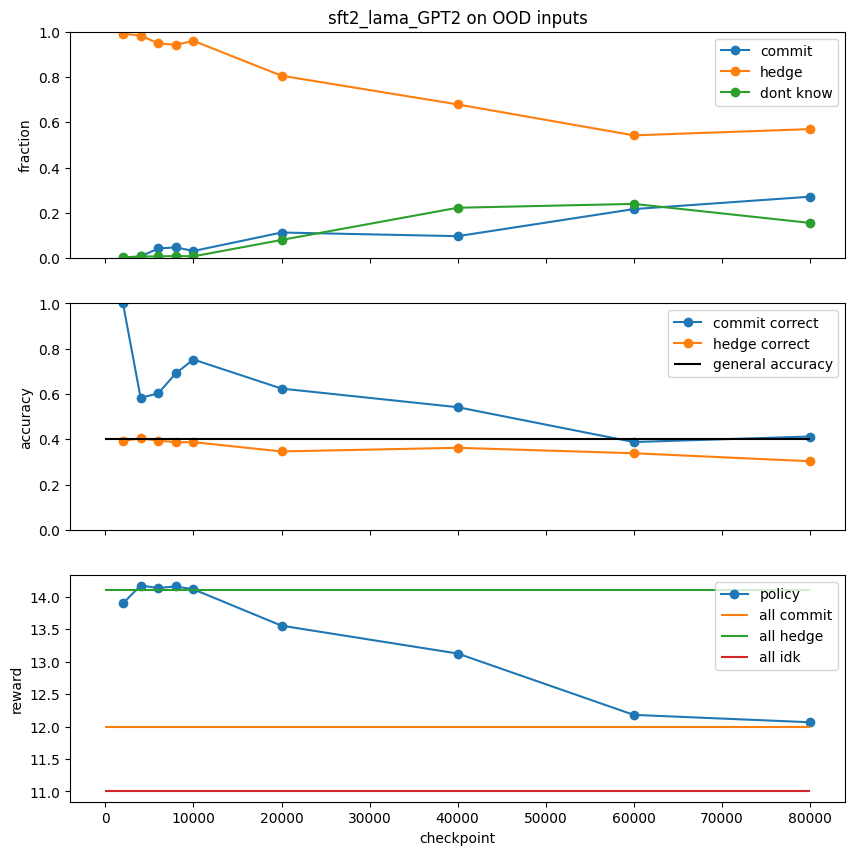

In [42]:
#make 3 subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

axs[0].plot(checkpoints, frac_commit_all, "o-", label="commit")
axs[0].plot(checkpoints, frac_hedge_all, "o-",label="hedge")
axs[0].plot(checkpoints, frac_dont_know_all, "o-",label="dont know")
axs[0].set_ylabel("fraction")
axs[0].legend()
axs[0].set_title("sft2_lama_GPT2 on OOD inputs")
axs[0].set_ylim([0, 1])

axs[1].plot(checkpoints, frac_commit_correct_all, "o-",label="commit correct")
axs[1].plot(checkpoints, frac_hedge_correct_all, "o-",label="hedge correct")
axs[1].hlines(0.4, 0, 80000, color = "black", label="general accuracy")
axs[1].set_ylabel("accuracy")
axs[1].set_ylim([0, 1])
axs[1].legend()

axs[2].plot(checkpoints, reward_all, "o-",label="policy")
axs[2].hlines(0.4*30, 0, 80000, color = "C1", label="all commit")
axs[2].hlines(0.4*25.5+0.6*6.5, 0, 80000, color = "C2", label="all hedge")
axs[2].hlines(11, 0, 80000, color = "C3", label="all idk")
axs[2].legend()
axs[2].set_ylabel("reward")
axs[2].set_xlabel("checkpoint")

In [43]:
checkpoints = [10000, 20000, 40000, 60000, 80000]

frac_commit_all = []
frac_hedge_all = []
frac_dont_know_all = []
frac_commit_correct_all = []
frac_hedge_correct_all = []
reward_all = []

for checkpoint in checkpoints:
    sft2_model_path3 =  "ckpts/sft2_lama_GPT2_lr1e-4/checkpoint_{:05d}/hf_model".format(checkpoint)
    sft_generation_categories3 = np.load(sft2_model_path3+"/generation_categories.npy")
    print(checkpoint)
    ood_idxs = np.where(sft_generation_categories3[:, 0]==3)[0]
    frac_commit, frac_hedge, frac_dont_know, frac_commit_correct, frac_hedge_correct, reward =  get_stats(sft_generation_categories3, ood_idxs)
    frac_commit_all.append(frac_commit)
    frac_hedge_all.append(frac_hedge)
    frac_dont_know_all.append(frac_dont_know)
    frac_commit_correct_all.append(frac_commit_correct)
    frac_hedge_correct_all.append(frac_hedge_correct)
    reward_all.append(reward)



10000
frac commit:  0.15165411071077628
frac hedge:  0.8378643956763839
frac dont know:  0.004585653455617425
frac commit correct:  0.673866090712743
frac hedge correct:  0.20641125879593433
reward:  11.848345889289224
20000
frac commit:  0.1342941369145103
frac hedge:  0.7929905011464133
frac dont know:  0.05535538814281035
frac commit correct:  0.6414634146341464
frac hedge correct:  0.1928954977282115
reward:  11.254012446773665
40000
frac commit:  0.1356043236161153
frac hedge:  0.8463806092368162
frac dont know:  0.013429413691451031
frac commit correct:  0.5531400966183575
frac hedge correct:  0.18808049535603716
reward:  10.924009171306912
60000
frac commit:  0.18440877825090074
frac hedge:  0.696036685227645
frac dont know:  0.09891909597117589
frac commit correct:  0.5115452930728241
frac hedge correct:  0.15435294117647058
reward:  10.483622666229937
80000
frac commit:  0.20144120537176546
frac hedge:  0.7271536193907632
frac dont know:  0.040288241074353096
frac commit corre

Text(0.5, 0, 'checkpoint')

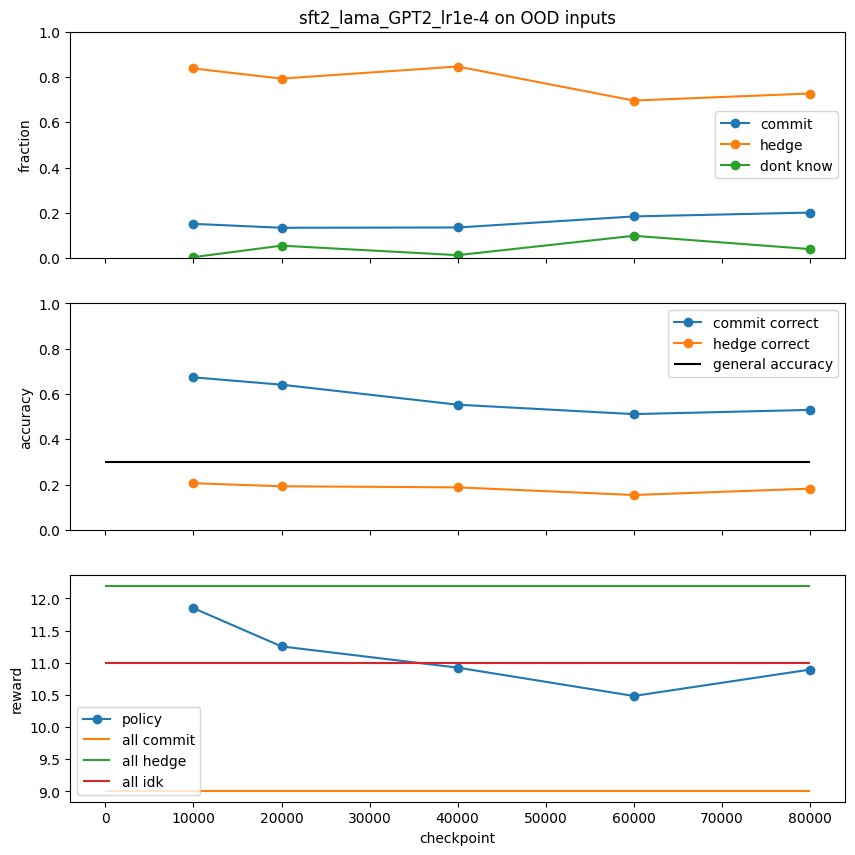

In [45]:
#make 3 subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

axs[0].plot(checkpoints, frac_commit_all, "o-", label="commit")
axs[0].plot(checkpoints, frac_hedge_all, "o-",label="hedge")
axs[0].plot(checkpoints, frac_dont_know_all, "o-",label="dont know")
axs[0].set_ylabel("fraction")
axs[0].legend()
axs[0].set_title("sft2_lama_GPT2_lr1e-4 on OOD inputs")
axs[0].set_ylim([0, 1])

axs[1].plot(checkpoints, frac_commit_correct_all, "o-",label="commit correct")
axs[1].plot(checkpoints, frac_hedge_correct_all, "o-",label="hedge correct")
axs[1].hlines(0.3, 0, 80000, color = "black", label="general accuracy")
axs[1].set_ylabel("accuracy")
axs[1].set_ylim([0, 1])
axs[1].legend()

axs[2].plot(checkpoints, reward_all, "o-",label="policy")
axs[2].hlines(0.3*30, 0, 80000, color = "C1", label="all commit")
axs[2].hlines(0.3*25.5+0.7*6.5, 0, 80000, color = "C2", label="all hedge")
axs[2].hlines(11, 0, 80000, color = "C3", label="all idk")
axs[2].legend()
axs[2].set_ylabel("reward")
axs[2].set_xlabel("checkpoint")

In [46]:
checkpoints = [10000, 20000, 40000, 60000, 80000]

frac_commit_all = []
frac_hedge_all = []
frac_dont_know_all = []
frac_commit_correct_all = []
frac_hedge_correct_all = []
reward_all = []

for checkpoint in checkpoints:
    sft2_model_path3 =  "ckpts/ppo_lama_GPT2_3_commit30_hedge25.5_6.5_idk11_cr0.0005/checkpoint_{:05d}/hf_model".format(checkpoint)
    sft_generation_categories3 = np.load(sft2_model_path3+"/generation_categories.npy")
    print(checkpoint)
    ood_idxs = np.where(sft_generation_categories3[:, 0]==3)[0]
    frac_commit, frac_hedge, frac_dont_know, frac_commit_correct, frac_hedge_correct, reward =  get_stats(sft_generation_categories3, ood_idxs)
    frac_commit_all.append(frac_commit)
    frac_hedge_all.append(frac_hedge)
    frac_dont_know_all.append(frac_dont_know)
    frac_commit_correct_all.append(frac_commit_correct)
    frac_hedge_correct_all.append(frac_hedge_correct)
    reward_all.append(reward)



10000
frac commit:  0.00032754667540124465
frac hedge:  0.32427120864723225
frac dont know:  0.6754012446773665
frac commit correct:  0.0
frac hedge correct:  0.6414141414141414
reward:  13.489027186374058
20000
frac commit:  0.00917130691123485
frac hedge:  0.47264985260399606
frac dont know:  0.5175237471339665
frac commit correct:  0.7142857142857143
frac hedge correct:  0.6396396396396397
reward:  14.705699312151982
40000
frac commit:  0.20275139207337045
frac hedge:  0.6796593514575827
frac dont know:  0.11529642974123813
frac commit correct:  0.7237479806138933
frac hedge correct:  0.3787951807228916
reward:  14.979855879462823
60000
frac commit:  0.23517851293809366
frac hedge:  0.662626924336718
frac dont know:  0.09957418932197838
frac commit correct:  0.7576601671309192
frac hedge correct:  0.3435491843796342
reward:  15.073206681952179
80000
frac commit:  0.22764493940386504
frac hedge:  0.6740910579757615
frac dont know:  0.09564362921716345
frac commit correct:  0.77697841

Text(0.5, 0, 'checkpoint')

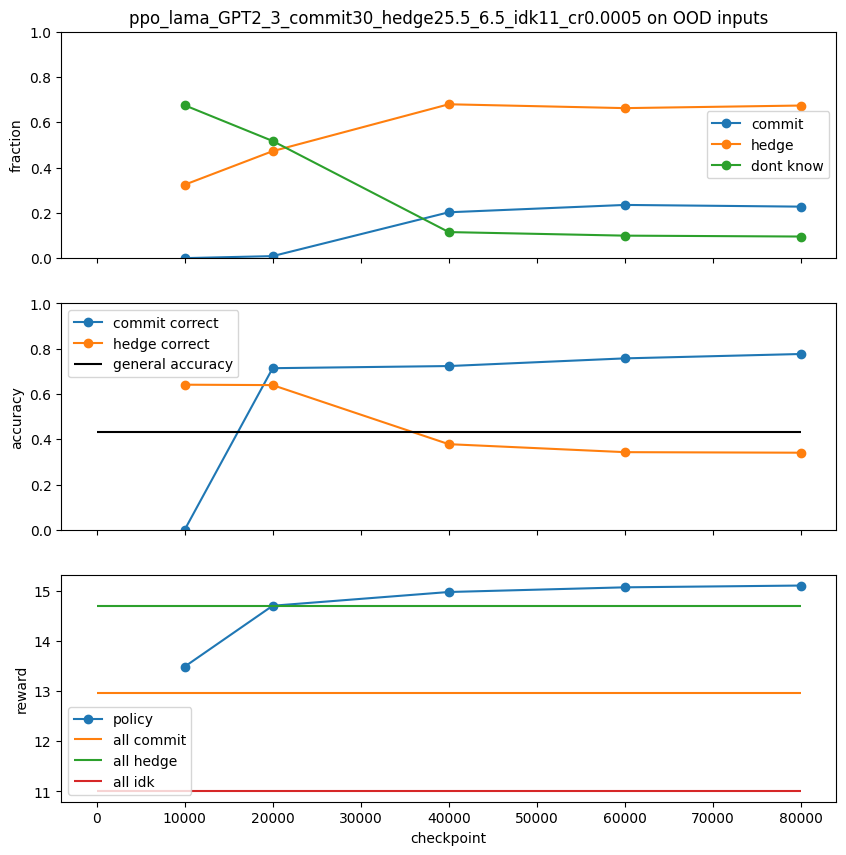

In [47]:
#make 3 subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

axs[0].plot(checkpoints, frac_commit_all, "o-", label="commit")
axs[0].plot(checkpoints, frac_hedge_all, "o-",label="hedge")
axs[0].plot(checkpoints, frac_dont_know_all, "o-",label="dont know")
axs[0].set_ylabel("fraction")
axs[0].legend()
axs[0].set_title("ppo_lama_GPT2_3_commit30_hedge25.5_6.5_idk11_cr0.0005 on OOD inputs")
axs[0].set_ylim([0, 1])

axs[1].plot(checkpoints, frac_commit_correct_all, "o-",label="commit correct")
axs[1].plot(checkpoints, frac_hedge_correct_all, "o-",label="hedge correct")
axs[1].hlines(0.432, 0, 80000, color = "black", label="general accuracy")
axs[1].set_ylabel("accuracy")
axs[1].set_ylim([0, 1])
axs[1].legend()

axs[2].plot(checkpoints, reward_all, "o-",label="policy")
axs[2].hlines(0.432*30, 0, 80000, color = "C1", label="all commit")
axs[2].hlines(0.432*25.5+(1-0.432)*6.5, 0, 80000, color = "C2", label="all hedge")
axs[2].hlines(11, 0, 80000, color = "C3", label="all idk")
axs[2].legend()
axs[2].set_ylabel("reward")
axs[2].set_xlabel("checkpoint")